## 네이버 얼굴인식 기능

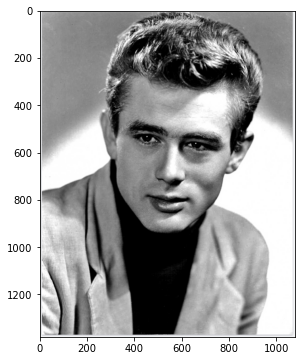

In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('./data/face_detection1.jpg')
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.show()

In [25]:
import requests
import json

client_id = "r6qI_94FASAJ5Tc7gDGO"
client_secret = "K1NBHzZ43n"

url = "https://openapi.naver.com/v1/vision/celebrity"
files = {'image': open('./data/face_detection1.jpg', 'rb')}
headers = {"X-Naver-Client-Id": client_id, "X-Naver-Client-Secret": client_secret}

response = requests.post(url, files=files, headers=headers)
print(response.text)

parsed = json.loads(response.text)  
# print(parsed)
print(type(parsed))

# 파이썬 딕셔너리를 json.dumps() 사용하면 json 데이터가 됨
print(json.dumps(parsed, indent=4, sort_keys=False, ensure_ascii=False)) 
# confidence는 일치(확률)

{"info":{"size":{"width":1082,"height":1380},"faceCount":1},"faces":[{"celebrity":{"value":"이병헌","confidence":0.177621}}]}
<class 'dict'>
{
    "info": {
        "size": {
            "width": 1082,
            "height": 1380
        },
        "faceCount": 1
    },
    "faces": [
        {
            "celebrity": {
                "value": "이병헌",
                "confidence": 0.177621
            }
        }
    ]
}


## 인식된 얼굴 사진에 정보 표시하기

In [26]:
import requests
import json

client_id = "r6qI_94FASAJ5Tc7gDGO"
client_secret = "K1NBHzZ43n"

url = "https://openapi.naver.com/v1/vision/face"
files = {'image': open('./data/face_detection1.jpg', 'rb')}
headers = {"X-Naver-Client-Id": client_id, "X-Naver-Client-Secret": client_secret}

response = requests.post(url, files=files, headers=headers)

detect_result = json.loads(response.text)
detect_result

{'info': {'size': {'width': 1082, 'height': 1380}, 'faceCount': 1},
 'faces': [{'roi': {'x': 328, 'y': 450, 'width': 458, 'height': 458},
   'landmark': {'leftEye': {'x': 449, 'y': 532},
    'rightEye': {'x': 666, 'y': 568},
    'nose': {'x': 539, 'y': 694},
    'leftMouth': {'x': 448, 'y': 782},
    'rightMouth': {'x': 636, 'y': 799}},
   'gender': {'value': 'male', 'confidence': 0.999998},
   'age': {'value': '26~30', 'confidence': 0.17594},
   'emotion': {'value': 'neutral', 'confidence': 0.999995},
   'pose': {'value': 'frontal_face', 'confidence': 0.997619}}]}

In [27]:
detect_result.keys()

dict_keys(['info', 'faces'])

In [28]:
detect_result['faces']

[{'roi': {'x': 328, 'y': 450, 'width': 458, 'height': 458},
  'landmark': {'leftEye': {'x': 449, 'y': 532},
   'rightEye': {'x': 666, 'y': 568},
   'nose': {'x': 539, 'y': 694},
   'leftMouth': {'x': 448, 'y': 782},
   'rightMouth': {'x': 636, 'y': 799}},
  'gender': {'value': 'male', 'confidence': 0.999998},
  'age': {'value': '26~30', 'confidence': 0.17594},
  'emotion': {'value': 'neutral', 'confidence': 0.999995},
  'pose': {'value': 'frontal_face', 'confidence': 0.997619}}]

In [29]:
detect_result['faces'][0]['roi']   # roi:rectangle of infomation

{'x': 328, 'y': 450, 'width': 458, 'height': 458}

In [30]:
detect_result['faces'][0]['gender']

{'value': 'male', 'confidence': 0.999998}

In [31]:
detect_result['faces'][0]['age']

{'value': '26~30', 'confidence': 0.17594}

In [32]:
detect_result['faces'][0]['emotion']

{'value': 'neutral', 'confidence': 0.999995}

In [33]:
#values()로 값을 받고, 그 값을 개수에 맞춰 각 변수에 저장함
x, y, w, h = detect_result['faces'][0]['roi'].values()
gender, gen_confidence = detect_result['faces'][0]['gender'].values()
emotion, emotion_confidence = detect_result['faces'][0]['emotion'].values()
age, age_confidence = detect_result['faces'][0]['age'].values()

In [34]:
annotation = f"{gender}: {gen_confidence}\n{emotion}: {emotion_confidence}\n{age}: {age_confidence}"
print(annotation)

male: 0.999998
neutral: 0.999995
26~30: 0.17594


### 인식된 얼굴 사진에 박스 넣기
#### matplotlib.patches는 jpg등의 사진에 추가로 박스나 원형도형을 그릴수 있게 도와주는 모듈임

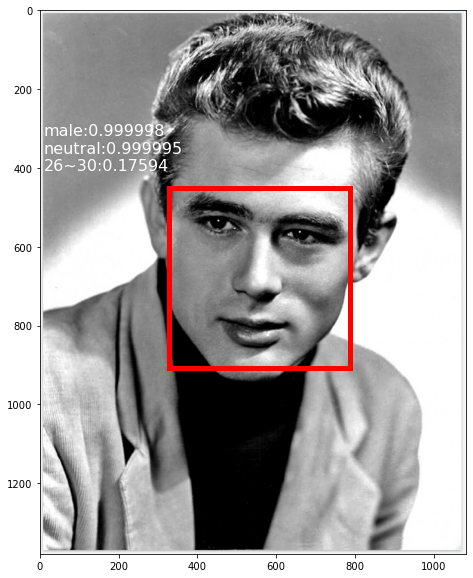

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

img = mpimg.imread('./data/face_detection1.jpg')
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)

#  선의 굵기(linewith), 테두리색(edgecolor), 채움색(facecolor)
rect_face = patches.Rectangle((x,y),w,h,
                             linewidth=5,
                             edgecolor='r',
                             facecolor='none')
ax.add_patch(rect_face)
# plt.text()는 그림에 글자를 입력하는 함수임
plt.text(10, 400, annotation, wrap=True, color='white', fontsize='16')
plt.show()